In [1]:
import healpy as hp
%pylab inline
import numpy as np
import astropy.io.fits as pf
import pylab as mplot

Populating the interactive namespace from numpy and matplotlib


In [2]:
# pf.open('COM_CompMap_Compton-SZMap-nilc-ymaps_2048_R2.00.fits')[1].data['FULL']

In [3]:
mapp = pf.open('COM_CompMap_Compton-SZMap-nilc-ymaps_2048_R2.00.fits')[1].data['FULL']
#*pf.open('COM_CompMap_Compton-SZMap-nilc-ymaps_2048_R2.00.fits')[1].data['MASK']
#hp.read_map('COM_CompMap_Compton-SZMap-nilc-ymaps_2048_R2.00.fits')
#COM_CompMap_Compton-SZMap-nilc-ymaps_2048_R2.00.fits

In [4]:
# help(hp.mollview)

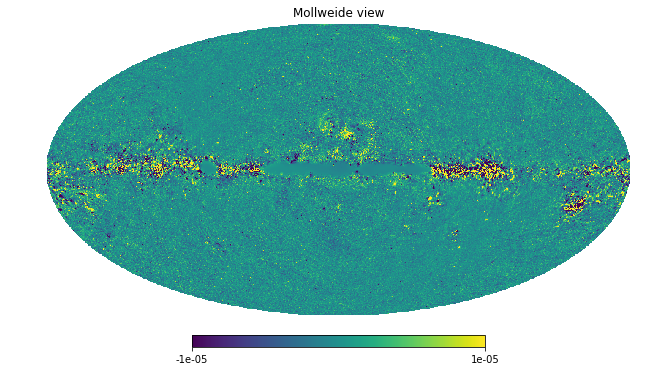

In [5]:
hp.mollview(mapp, min=-0.00001, max=0.00001)

In [6]:
RM_mask_cat = pf.open('y3_gold_2.2.1_wide_sofcol_run2_redmapper_v6.4.22+2_lgt20_vl02_vlim_zmask.fit')[1].data
RM_mask = np.zeros(hp.nside2npix(4096))
RM_mask[RM_mask_cat['HPIX'][(RM_mask_cat['ZMAX']>0.5)]] = 1
# print(RM_mask[1].header.keys)

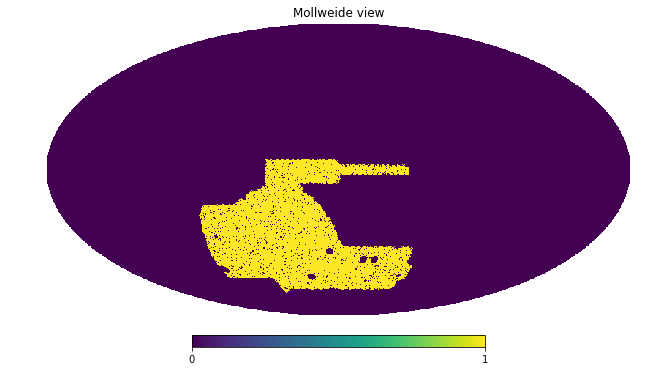

In [7]:
hp.mollview(RM_mask, nest=False)

In [8]:
RM = pf.open('y3_gold_2.2.1_wide_sofcol_run2_redmapper_v6.4.22+2_lgt20_vl02_catalog.fit')[1].data
RM_ran = pf.open('y3_gold_2.2.1_wide_sofcol_run2_redmapper_v6.4.22+2_randcat_z0.10-0.95_lgt020_vl02.fit')[1].data
# print(pf.open('y3_gold_2.2.1_wide_sofcol_run2_redmapper_v6.4.22+2_randcat_z0.10-0.95_lgt020_vl02.fit')[1].header.keys)
# print(RM[1].header.keys)
mask = (RM['ZRED']>0.3)*(RM['ZRED']<0.5)
mask2 = (RM_ran['ZTRUE']>0.3)*(RM_ran['ZTRUE']<0.5)
ra_RM = RM['RA'][mask]
dec_RM = RM['DEC'][mask]
ra_RM_ran = RM_ran['RA'][mask2]
dec_RM_ran = RM_ran['DEC'][mask2]

In [9]:
ids = np.arange(hp.nside2npix(2048))

In [10]:
theta, phi = hp.pix2ang(2048, ids, nest=False)

In [11]:
r = hp.Rotator(coord=['G','E'])  # Transforms galactic to ecliptic coordinates
theta_ecl, phi_ecl = r(theta, phi)

pix2 = hp.ang2pix(4096,theta_ecl, phi_ecl, nest=False)
mask_des = (RM_mask[pix2] == 1)
theta_ecl = theta_ecl[mask_des]
phi_ecl = phi_ecl[mask_des]
mapp = mapp[mask_des]

In [12]:
print(len(phi_ecl))

5673527


In [13]:
# ra= phi*180./np.pi
# dec = 90.-(theta*180./np.pi)

ra= phi_ecl*180./np.pi
dec = 90.-(theta_ecl*180./np.pi)

In [ ]:
import treecorr
cat1 = treecorr.Catalog(ra=ra_RM, dec=dec_RM,ra_units='degrees', dec_units='degrees')
cat2 = treecorr.Catalog(ra=ra_RM_ran, dec=dec_RM_ran,ra_units='degrees', dec_units='degrees')
cat3 = treecorr.Catalog(ra=ra, dec=dec, k=mapp, ra_units='degrees', dec_units='degrees')

nk1 = treecorr.NKCorrelation(min_sep=1., max_sep=100., nbins=20, sep_units='arcmin')
nk1.process(cat1, cat3)
nk2 = treecorr.NKCorrelation(min_sep=1., max_sep=100., nbins=20, sep_units='arcmin')
nk2.process(cat2, cat3)


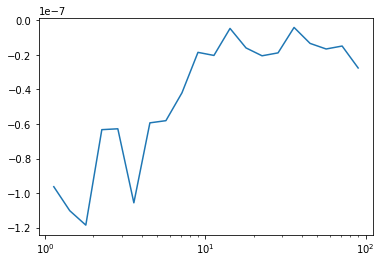

In [137]:
mplot.semilogx(np.exp(nk.meanlogr), nk1.xi-nk2.xi)